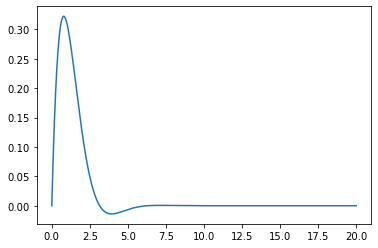

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from wave import WavePDESolver




t0 = 0
t1 = 20

d_func = lambda x: 1/5 * x
e_func = d_func

pde = WavePDESolver( t0, t1, d_func, e_func )

n = 1+1000
dt = 0.01
x0 = 0
x1 = 3
mesh = np.linspace(x0, x1, n, endpoint=True)


# u0 = 1-1/(1+1/50*(mesh-1.5)**-2)
u0 = 0*mesh
v0 = 0*u0

U0 = (u0,v0)

# boundaryf1 = lambda t: np.sin(0.5-t)*(1-1/(1+1e-1*(t-0.5)**-2))
boundaryf1 = lambda t: np.sin(t)*np.exp(-t)

boundaries = (
    {'type': 'neumann', 'f': boundaryf1},
    {'type': 'dirichlet', 'f': lambda t: 0.0},
#     {'type': 'neumann', 'f': lambda t: 0.0},
)
plt.plot(
    np.arange(t0, t1, dt),
    boundaryf1(np.arange(t0, t1, dt)),
)


100%|██████████| 2001/2001 [00:00<00:00, 3853.89it/s]


(2002, 1001)


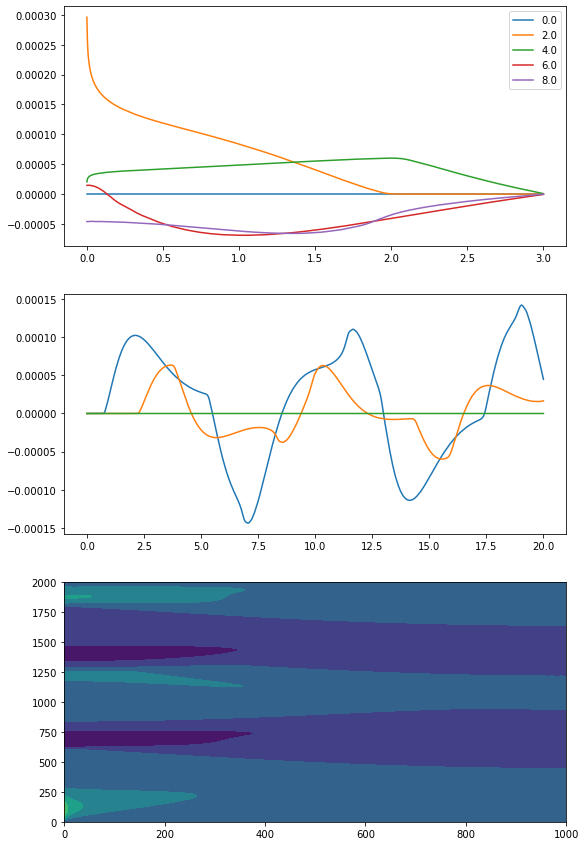

In [2]:

sol = pde.solve(
    U0 = U0,
    mesh = mesh,
    dt = dt,
    boundaries = boundaries,
    progress=True
)


print(sol['U'].shape)

fig, axs = plt.subplots(3, figsize=(9,15))

for i in range(0, int(10/dt), int(2/dt)):
    axs[0].plot(
        mesh,
        sol['U'][i,:],
        label=str(sol['time'][i])
    )
axs[0].legend()

axs[1].plot(
    sol['time'],
    sol['U'][:, n//4],
)
axs[1].plot(
    sol['time'],
    sol['U'][:, 3*n//4],
)
axs[1].plot(
    sol['time'],
    sol['U'][:, -1],
)


axs[2].contourf(
    sol['U']
)
plt.show()